In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import helper
from matplotlib.lines import Line2D
import matplotlib.image as mpimg

In [2]:
palette = ["#2E610F", "#D9443D", "#7F5072", "#CFA97C", "#43383D"]

sns.set_style("ticks")
sns.set_palette(palette, 5)

In [3]:
output_path = "C:\\Users\\azgonnikov\\Dropbox\\Apps\\Overleaf\\AAP Dynamics of merging decisions Elsevier template"
data = pd.read_csv("processed_eye_data.csv")
metrics = pd.read_csv("metrics.csv")

# Interest areas mapped onto participants' view 

In [4]:
mirror_x_min, mirror_x_max, mirror_y_min, mirror_y_max, front_x_min, front_x_max, front_y_min, front_y_max = helper.get_constants()

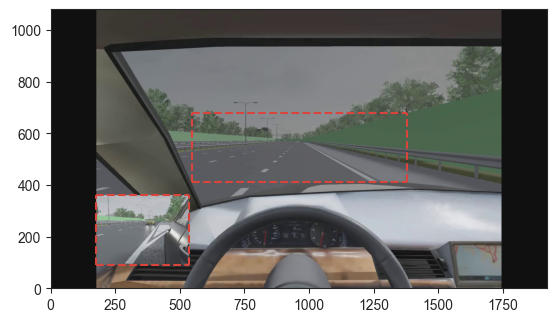

In [6]:
frame_color = "C1"

fig, ax = plt.subplots()
img = mpimg.imread("Video1.mp4.png")

ax.set_aspect("equal")
# sns.histplot(data=data, x="eye_x", y="eye_y", ax=ax)
imgplot = ax.imshow(np.flipud(img),origin="lower")
ax.set_xlim((0, 1920))
ax.set_ylim((0, 1080))
ax.hlines(y=[mirror_y_min, mirror_y_max], xmin=mirror_x_min, xmax=mirror_x_max, color=frame_color, ls='--')
ax.vlines(x=[mirror_x_min, mirror_x_max], ymin=mirror_y_min, ymax=mirror_y_max, color=frame_color, ls='--')

ax.hlines(y=[front_y_min, front_y_max], xmin=front_x_min, xmax=front_x_max, color=frame_color, ls='--')
ax.vlines(x=[front_x_min, front_x_max], ymin=front_y_min, ymax=front_y_max, color=frame_color, ls='--')

# Gaze behavior in an example trial

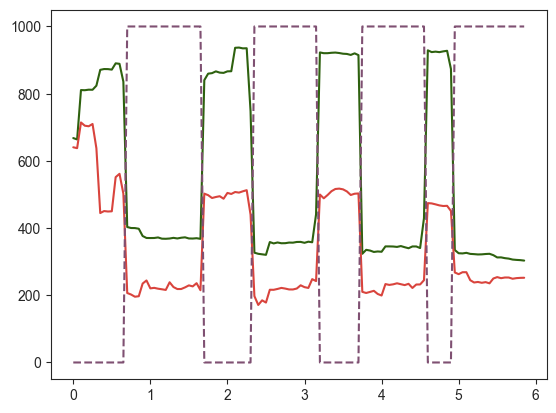

In [8]:
trial = data[(data.participant==3) & (data.trial==1)]

plt.plot(trial.t, trial.eye_x)
plt.plot(trial.t, trial.eye_y)
plt.plot(trial.t, (trial.AOI=="mirror")*1000, ls="--")

# Decision outcome: Interaction between dwell time on the mirror and kinematic variables

In [24]:
metrics["RT_tertile"] = pd.qcut(metrics["RT"], q=3, precision=2)
metrics["RT_decile"] = pd.qcut(metrics["RT"], q=10, precision=2)
metrics["dwell_mirror_tertile"] = pd.qcut(metrics["dwell_mirror"], q=3, precision=2)
metrics["dwell_mirror_decile"] = pd.qcut(metrics["dwell_mirror"], q=10, precision=2)

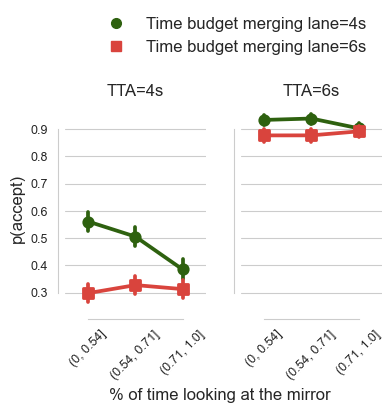

In [25]:
fontsize = 9
height = 3
width = 2

time_budgets = [4, 6]
markers=["o", "s"]
colors = ["C0", "C1"]
ms=7

g = sns.catplot(data=metrics, x="dwell_mirror_tertile", y="is_gap_accepted", hue="time_budget", col="tta", 
                join=True, kind="point", height=height, aspect=width/height, markers=markers)
for ax, TTA in zip(g.axes.flatten(), [4, 6]):
    ax.xaxis.set_tick_params(labelsize=fontsize)
    ax.yaxis.set_tick_params(labelsize=fontsize)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel("")
    ax.set_ylabel("p(accept)", fontsize=fontsize+3)
    ax.set_title("TTA=%is" % TTA)

labels = [item.get_text() for item in g.axes.flatten()[0].get_xticklabels()]
labels[0] = labels[0].replace("-0.01", "0")
g.axes.flatten()[0].set_xticklabels(labels)
g.axes.flatten()[1].set_xticklabels(labels)
g.legend.set_visible(False)
legend_elements = ([Line2D([0], [0], color=color, marker=marker, ms=ms, lw=0, label="Time budget merging lane=%is" % (time_budget)) for time_budget, color, marker in zip(time_budgets, colors, markers)])
plt.figlegend(handles=legend_elements, loc="lower left", bbox_to_anchor=(0.2, 1.00), fontsize=12, frameon=False)

plt.figtext(x=0.25, y=-.1, s="% of time looking at the mirror", fontsize=fontsize+3)
sns.despine(offset=5, trim=True)

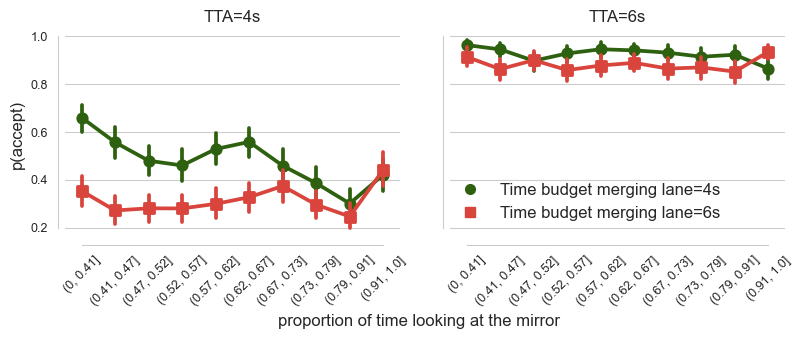

In [27]:
fontsize = 9
height = 3
width = 4

time_budgets = [4, 6]
markers=["o", "s"]
colors = ["C0", "C1"]
ms=7

g = sns.catplot(data=metrics, x="dwell_mirror_decile", y="is_gap_accepted", hue="time_budget", col="tta", 
                join=True, kind="point", height=height, aspect=width/height, markers=markers)
for ax, TTA in zip(g.axes.flatten(), [4, 6]):
    ax.xaxis.set_tick_params(labelsize=fontsize)
    ax.yaxis.set_tick_params(labelsize=fontsize)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel("")
    ax.set_ylabel("p(accept)", fontsize=fontsize+3)
    ax.set_title("TTA=%is" % TTA)

labels = [item.get_text() for item in g.axes.flatten()[0].get_xticklabels()]
labels[0] = labels[0].replace("-0.01", "0")
g.axes.flatten()[0].set_xticklabels(labels)
g.axes.flatten()[1].set_xticklabels(labels)
g.legend.set_visible(False)
legend_elements = ([Line2D([0], [0], color=color, marker=marker, ms=ms, lw=0, label="Time budget merging lane=%is" % (time_budget)) for time_budget, color, marker in zip(time_budgets, colors, markers)])
plt.figlegend(handles=legend_elements, loc="lower left", bbox_to_anchor=(0.5, 0.2), fontsize=12, frameon=False)

plt.figtext(x=0.32, y=-.1, s="proportion of time looking at the mirror", fontsize=fontsize+3)
sns.despine(offset=5, trim=True)

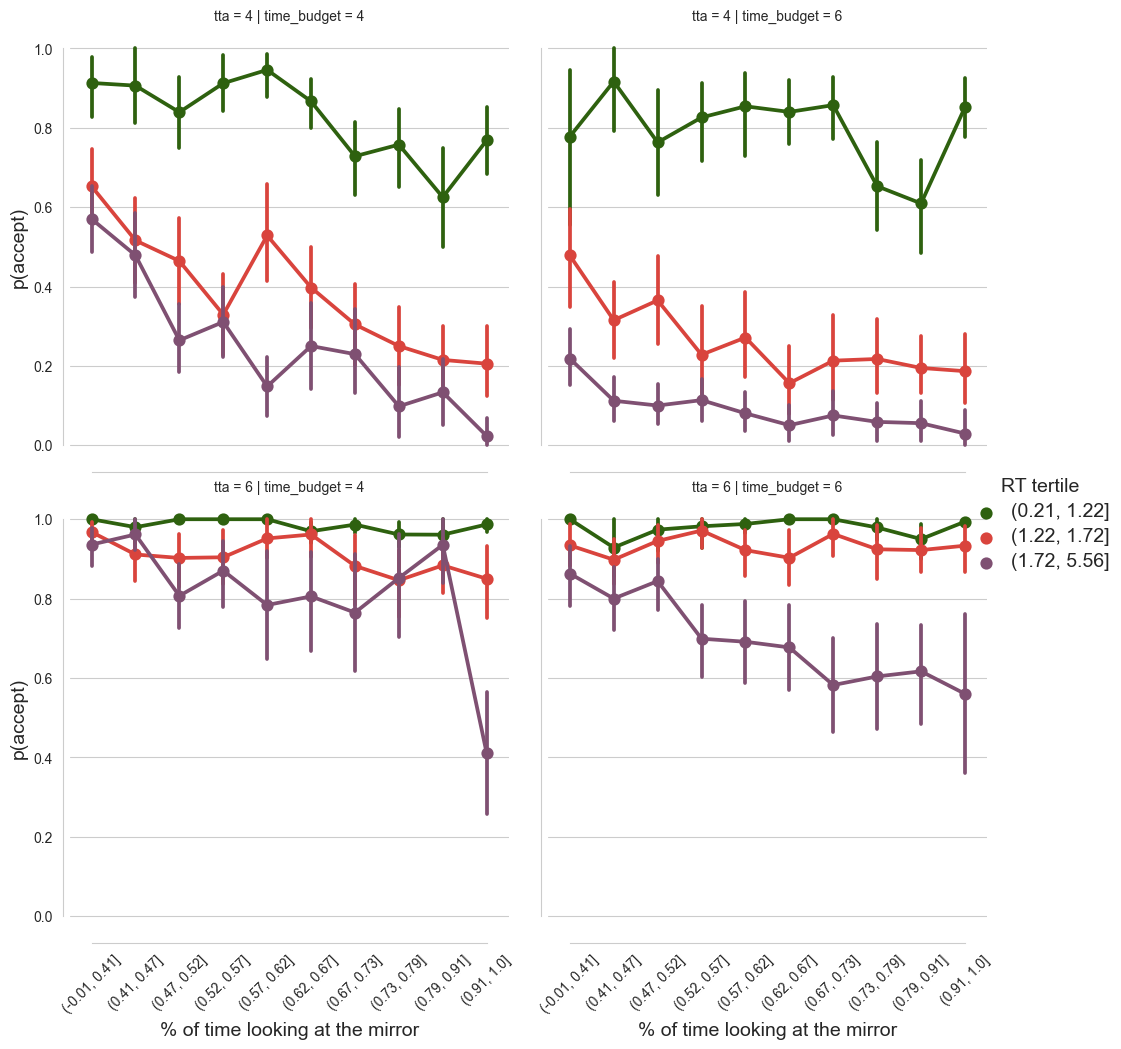

In [29]:
fontsize = 14
g = sns.catplot(data=metrics, row="tta", col="time_budget", x="dwell_mirror_decile", y="is_gap_accepted", hue="RT_tertile", kind="point")
# g = sns.catplot(data=metrics, row="tta", col="time_budget", x="RT_decile", y="is_gap_accepted", hue="dwell_time_tertile", kind="point")


for ax in g.axes.flatten():
    ax.xaxis.set_tick_params(rotation=45)    
    ax.set_xlabel("% of time looking at the mirror", fontsize=fontsize)
    ax.set_ylabel("p(accept)", fontsize=fontsize)
    # ax.set_title("Time budget merging lane=%is" % tta, fontsize=fontsize)
    
g.legend.set_title("RT tertile")
g.legend.get_title().set_fontsize(fontsize)
for text in g.legend.get_texts():
    text.set_fontsize(fontsize)
sns.despine(offset=5, trim=True)

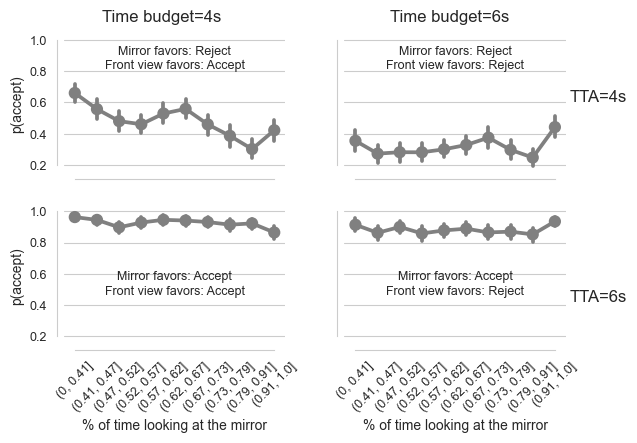

In [33]:
fontsize = 9
height = 2
width = 3

g = sns.catplot(data=metrics, x="dwell_mirror_decile", y="is_gap_accepted", col="time_budget", row="tta", 
                join=True, kind="point", color="grey", height=height, aspect=width/height)

for ax in g.axes.flatten():
    ax.xaxis.set_tick_params(labelsize=fontsize)
    ax.yaxis.set_tick_params(labelsize=fontsize)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel("% of time looking at the mirror", fontsize=fontsize+1)
    ax.set_ylabel("p(accept)", fontsize=fontsize+1)

labels = [item.get_text() for item in g.axes.flatten()[2].get_xticklabels()]
labels[0] = labels[0].replace("-0.01", "0")
g.axes.flatten()[2].set_xticklabels(labels)
g.axes.flatten()[3].set_xticklabels(labels)

plt.figtext(s="Time budget=4s", x=0.17, y=0.95, fontsize=fontsize+3)
plt.figtext(s="Time budget=6s", x=0.65, y=0.95, fontsize=fontsize+3)
plt.figtext(s="TTA=4s", x=0.95, y=0.75, fontsize=fontsize+3)
plt.figtext(s="TTA=6s", x=0.95, y=0.25, fontsize=fontsize+3)
g.axes.flatten()[0].set_title("Mirror favors: Reject\nFront view favors: Accept", fontsize=fontsize, y=0.7)
g.axes.flatten()[1].set_title("Mirror favors: Reject\nFront view favors: Reject", fontsize=fontsize, y=0.7)
g.axes.flatten()[2].set_title("Mirror favors: Accept\nFront view favors: Accept", fontsize=fontsize, y=0.3)
g.axes.flatten()[3].set_title("Mirror favors: Accept\nFront view favors: Reject", fontsize=fontsize, y=0.3)

sns.despine(offset=5, trim=True)